<h2> Building a prediction model for AirBNB prices on Seattle</h2>

<p>
For this occasion, I would like to propose an exercise of information analysis and modeling from beginning to end, highlighting what in my opinion are the best practices.

First of all, we must understand the business and its needs.

Today AirBNB has become the largest digital platform to offer and search for accommodation in the world. Airbnb currently has an offering of about 2,000,000 properties in 192 countries and 33,000 cities.

So we would like to ask some relevant questions for the business in this particular case.

<ul>
<li>What are the main factors that determine the price of accommodation? </li>
<li>As in traditional hotels, does offering amenities impact the final price? </li>
<li>Which Seattle neighborhood is the most expensive and cheapest to rent? </li>
<ul>
</p>

### Importing libraries

<p>For this case I am going to use these libraries to process data, visualize, do a statistical analysis and finally model</p> 

In [1]:
#Dealing with data
import pandas as pd
import numpy as np
import ast
#Visualization
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
#Modeling and basic stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

### Data

<p>In this case we will use Kaggle's open repository 'Seattle Airbnb Open Data' and specifically the file named <code>'listings.csv'</code></p>.

In [2]:
#Use pandas to read the file an use it as a DataFrame
listings_df = pd.read_csv('listings.csv')
#Visualize the first rows
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
print(listings_df.shape)
#Listing de column names
print(listings_df.columns)

(3818, 92)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'am

<p> It seems that we have too many columns, it is important to leave only information that is making me useless for analysis.</p>

### Preprocesing

<p>In this step, an initial analysis of the data is carried out, transformations and creation of new columns will be applied to meet the final objective </p>

In [4]:
#Chosing only the nesseary columns
columns = ['id', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_verifications', 
           'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed','property_type',
           'bathrooms', 'bedrooms', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 
           'availability_365', 'number_of_reviews', 'review_scores_rating', 'cancellation_policy']

In [5]:
#Defining a basic fuction to make a basic data analysis
def initial_analysis(df):
   
    print("Data basic stats:")
    print('\n')
    print("Total data:")
    print(len(df))
   
    col = df.columns
   
    for i in col:
       
        print('\n')
        print("Unique",i,":")
        print(df[i].unique())
        print(df[i].nunique())
       
   
    if (df.isnull().values.any()):
       
        plt.figure(figsize = (15,8))
        sns.heatmap(df.isnull().sort_values(by = list(col)), cbar=False)
   
    else:
       
        print('\n')
        print('Sin valores nulos')

<p>This basic analysis function allows us to establish dara characteristics such as:
<ul>
<li>Data format</li>
<li>Possible errors in the data</li>   
<li>Duplicate values</li> 
<li>Completeness of the information</li> 
</ul>
</p>

Data basic stats:


Total data:
3818


Unique id :
[  241032   953595  3308979 ... 10267360  9604740 10208623]
3818


Unique host_response_rate :
['96%' '98%' '67%' nan '100%' '71%' '97%' '60%' '50%' '31%' '90%' '70%'
 '88%' '80%' '63%' '33%' '99%' '75%' '83%' '94%' '58%' '43%' '93%' '92%'
 '40%' '57%' '89%' '95%' '78%' '81%' '91%' '38%' '86%' '30%' '56%' '76%'
 '64%' '82%' '17%' '87%' '25%' '69%' '53%' '65%' '68%' '55%']
45


Unique host_acceptance_rate :
['100%' nan '0%']
2


Unique host_is_superhost :
['f' 't' nan]
2


Unique host_verifications :
["['email', 'phone', 'reviews', 'kba']"
 "['email', 'phone', 'facebook', 'linkedin', 'reviews', 'jumio']"
 "['email', 'phone', 'google', 'reviews', 'jumio']"
 "['email', 'phone', 'facebook', 'reviews', 'jumio']"
 "['email', 'phone', 'facebook', 'reviews', 'kba']"
 "['email', 'phone', 'facebook', 'google', 'linkedin', 'reviews', 'jumio']"
 "['email', 'phone', 'facebook', 'linkedin', 'reviews', 'kba']"
 "['email', 'phone', 'linkedin', 'review

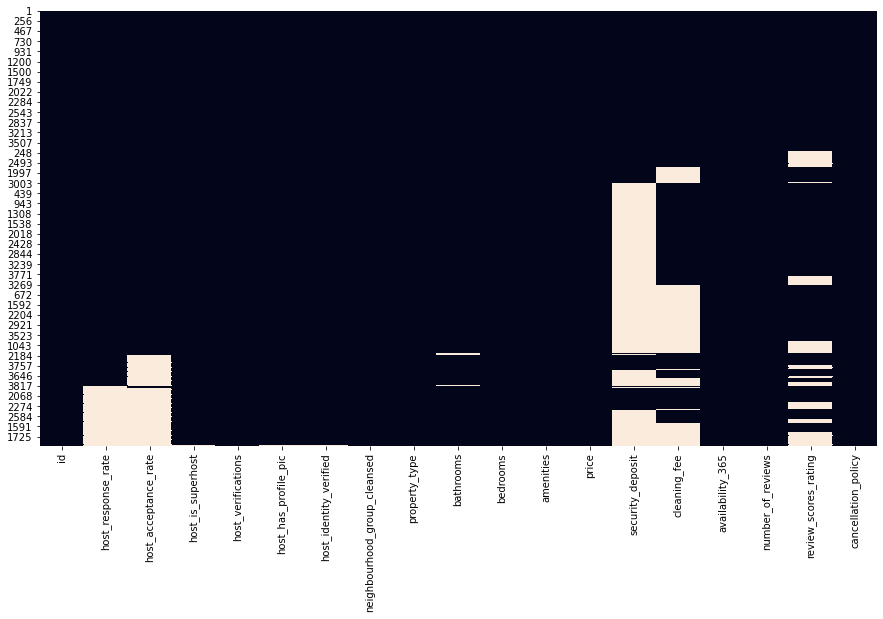

In [6]:
initial_analysis(listings_df[columns])

In [7]:
#Defining a new dataframe with columns of interest
listings_clean = listings_df[columns].copy()

<p>In the next step we apply transformations replacing characters that do not allow us to analyze the data as numeric and we transform the Boolean variables to a more general format.</p>

In [8]:
listings_clean.host_response_rate = listings_clean.host_response_rate.str.replace('%','').astype('float64')
listings_clean.host_acceptance_rate = listings_clean.host_acceptance_rate.str.replace('%','').astype('float64')
listings_clean.host_is_superhost = listings_clean.host_is_superhost.str.replace('t','1') 
listings_clean.host_is_superhost = listings_clean.host_is_superhost.str.replace('f','0') 
listings_clean.host_has_profile_pic = listings_clean.host_has_profile_pic.str.replace('t','1') 
listings_clean.host_has_profile_pic = listings_clean.host_has_profile_pic.str.replace('f','0') 
listings_clean.host_identity_verified = listings_clean.host_identity_verified.str.replace('t','1') 
listings_clean.host_identity_verified = listings_clean.host_identity_verified.str.replace('f','0') 
listings_clean.price = listings_clean.price.str.replace('$','')
listings_clean.price = listings_clean.price.str.replace(',','').astype(float) 

<p>Now we can create some new features from complex columns and null-valued data.</p>

In [9]:
#Count the diferent type of verifications that each host has
listings_clean.host_verifications = listings_clean.host_verifications.apply(lambda x: len(ast.literal_eval(x)) if ast.literal_eval(x) is not None else None)
#Create a boolena column to know if the place has extra cost
listings_clean['extra_cost'] = (listings_clean.security_deposit + listings_clean.cleaning_fee).isnull()
listings_clean.amenities = listings_clean.amenities.apply(lambda x: x.count(','))
#Deleting extra columns
del listings_clean['security_deposit']
del listings_clean['cleaning_fee']

In [10]:
listings_clean_copy = listings_clean.copy()

<p>It is time to give it the correct format to leave the variable so that the model can interpret as we want.</p>

In [11]:
listings_clean.dtypes

id                                int64
host_response_rate              float64
host_acceptance_rate            float64
host_is_superhost                object
host_verifications              float64
host_has_profile_pic             object
host_identity_verified           object
neighbourhood_group_cleansed     object
property_type                    object
bathrooms                       float64
bedrooms                        float64
amenities                         int64
price                           float64
availability_365                  int64
number_of_reviews                 int64
review_scores_rating            float64
cancellation_policy              object
extra_cost                         bool
dtype: object

In [12]:
listings_clean.host_is_superhost = listings_clean.host_is_superhost.astype('float64')
listings_clean.host_has_profile_pic = listings_clean.host_has_profile_pic.astype('float64')
listings_clean.host_identity_verified = listings_clean.host_identity_verified.astype('float64')
listings_clean.extra_cost = listings_clean.extra_cost.astype('float64')

<p>Another important step is to reduce the categorical variables where we have many categories, this can affect our future model and analysis, so we are going to see the distribution between these categories and determine if we can reduce them.</p>

In [13]:
listings_clean.property_type.value_counts()/len(listings_clean)

House              0.453903
Apartment          0.447355
Townhouse          0.030906
Condominium        0.023834
Loft               0.010477
Bed & Breakfast    0.009691
Other              0.005762
Cabin              0.005500
Camper/RV          0.003405
Bungalow           0.003405
Boat               0.002095
Tent               0.001310
Treehouse          0.000786
Dorm               0.000524
Chalet             0.000524
Yurt               0.000262
Name: property_type, dtype: float64

<p>It seems that 96% of the data is concentrated in the first 4 categories, so we are going to filter them and leave the rest as 'Other'.</p>

In [14]:
listings_clean.property_type = [i if i in ['House','Apartment','Townhouse','Condominium'] else 'Other' for i in listings_clean.property_type]

In [15]:
#preview of the data with the preprocessing steps till now
listings_clean.head()

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,property_type,bathrooms,bedrooms,amenities,price,availability_365,number_of_reviews,review_scores_rating,cancellation_policy,extra_cost
0,241032,96.0,100.0,0.0,4.0,1.0,1.0,Queen Anne,Apartment,1.0,1.0,9,85.0,346,207,95.0,moderate,1.0
1,953595,98.0,100.0,1.0,6.0,1.0,1.0,Queen Anne,Apartment,1.0,1.0,15,150.0,291,43,96.0,strict,0.0
2,3308979,67.0,100.0,0.0,5.0,1.0,1.0,Queen Anne,House,4.5,5.0,20,975.0,220,20,97.0,strict,0.0
3,7421966,NaN,NaN,0.0,5.0,1.0,1.0,Queen Anne,Apartment,1.0,0.0,13,100.0,143,0,NaN,flexible,1.0
4,278830,100.0,NaN,0.0,5.0,1.0,1.0,Queen Anne,House,2.0,3.0,12,450.0,365,38,92.0,strict,0.0


<p>Finally we need to impute the null values, it is important to ask why this data is missing and then evaluate some stats and decide what is the best way to impute them.<p>

In [16]:
listings_clean.isnull().sum()/len(listings_clean)

id                              0.000000
host_response_rate              0.136983
host_acceptance_rate            0.202462
host_is_superhost               0.000524
host_verifications              0.000524
host_has_profile_pic            0.000524
host_identity_verified          0.000524
neighbourhood_group_cleansed    0.000000
property_type                   0.000000
bathrooms                       0.004191
bedrooms                        0.001572
amenities                       0.000000
price                           0.000000
availability_365                0.000000
number_of_reviews               0.000000
review_scores_rating            0.169460
cancellation_policy             0.000000
extra_cost                      0.000000
dtype: float64

In [17]:
listings_clean.describe()

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,bathrooms,bedrooms,amenities,price,availability_365,number_of_reviews,review_scores_rating,extra_cost
count,3.818000e+03,3295.000000,3045.000000,3816.000000,3816.000000,3816.000000,3816.000000,3802.000000,3812.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3818.000000
mean,5.550111e+06,94.886798,99.967159,0.203878,4.670597,0.998166,0.785377,1.259469,1.307712,13.370613,127.976166,244.772656,22.223415,94.539262,0.556574
std,2.962660e+06,11.866705,1.812201,0.402932,1.166251,0.042796,0.410614,0.590369,0.883395,4.706825,90.250022,126.772526,37.730892,6.606083,0.496854
min,3.335000e+03,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,20.000000,0.000000
25%,3.258256e+06,98.000000,100.000000,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,10.000000,75.000000,124.000000,2.000000,93.000000,0.000000
50%,6.118244e+06,100.000000,100.000000,0.000000,5.000000,1.000000,1.000000,1.000000,1.000000,13.000000,100.000000,308.000000,9.000000,96.000000,1.000000
75%,8.035127e+06,100.000000,100.000000,0.000000,5.000000,1.000000,1.000000,1.000000,2.000000,16.000000,150.000000,360.000000,26.000000,99.000000,1.000000
max,1.034016e+07,100.000000,100.000000,1.000000,8.000000,1.000000,1.000000,8.000000,7.000000,29.000000,1000.000000,365.000000,474.000000,100.000000,1.000000


<p>Here we make our first decision and it is to delete the column 'host_acceptance_rate' that has 20% of the incomplete data, as it only has two possible values, imputing them would have a significant impact on the data and the variation of that field.</p>
<p>
Also, we can also show some columns that have a large concentration of data in a single value, so we could predict them.
</p>

In [18]:
del listings_clean['host_acceptance_rate']
del listings_clean['host_has_profile_pic']

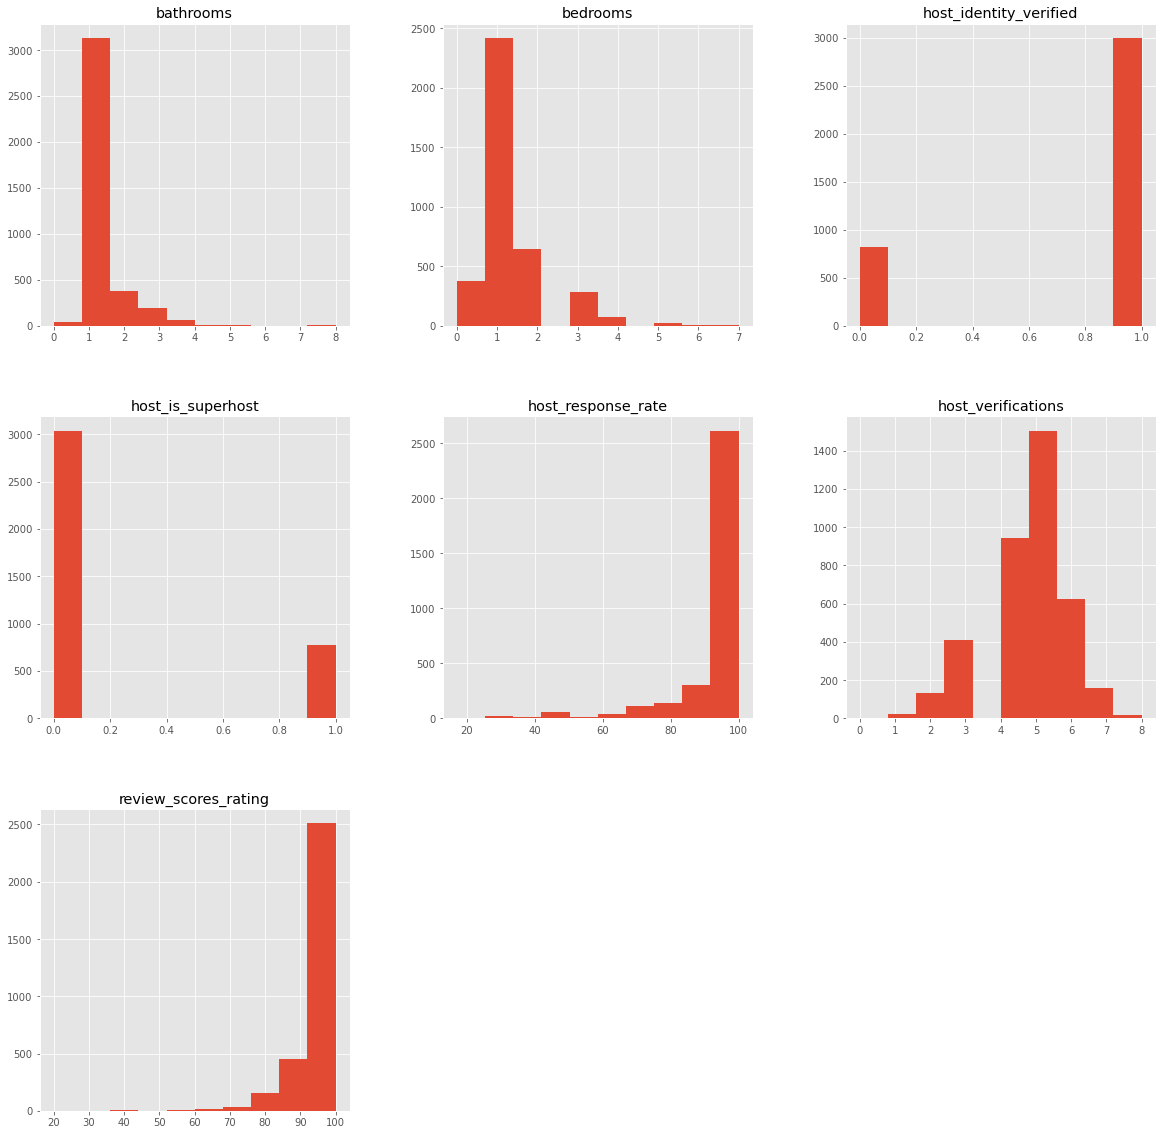

In [19]:
plt.style.use('ggplot');
listings_clean[['host_response_rate','host_is_superhost','host_verifications','host_identity_verified','bathrooms','bedrooms','review_scores_rating']].hist(figsize=(20,20));

<p>
For this specific case, we see that the trends in the histogram are very clear, the values ​​are concentrated in specific ranges, so we say that they are imputed with the median also because there are some outliers that can affect our imputation with averages and in some cases it helps because we need integer values ​​instead of floats, which is usually what the average gives.</p>

In [20]:
listings_clean.host_response_rate.fillna(listings_clean.host_response_rate.quantile(0.5), inplace = True)
listings_clean.host_is_superhost.fillna(listings_clean.host_is_superhost.quantile(0.5), inplace = True)
listings_clean.host_verifications.fillna(listings_clean.host_verifications.quantile(0.5), inplace = True)
listings_clean.host_identity_verified.fillna(listings_clean.host_identity_verified.quantile(0.5), inplace = True)
listings_clean.bathrooms.fillna(listings_clean.bathrooms.quantile(0.5), inplace = True)
listings_clean.bedrooms.fillna(listings_clean.bedrooms.quantile(0.5), inplace = True)
listings_clean.review_scores_rating.fillna(round(listings_clean.review_scores_rating.mean(),0), inplace = True)

### Visualizaing and undertendig data

<p> Making a correlation heat map is a useful tool to know relevant numerical variables for this exercise, so it allows to see if some variables are redundant that normally have a correlation greater than 0.85 </p>

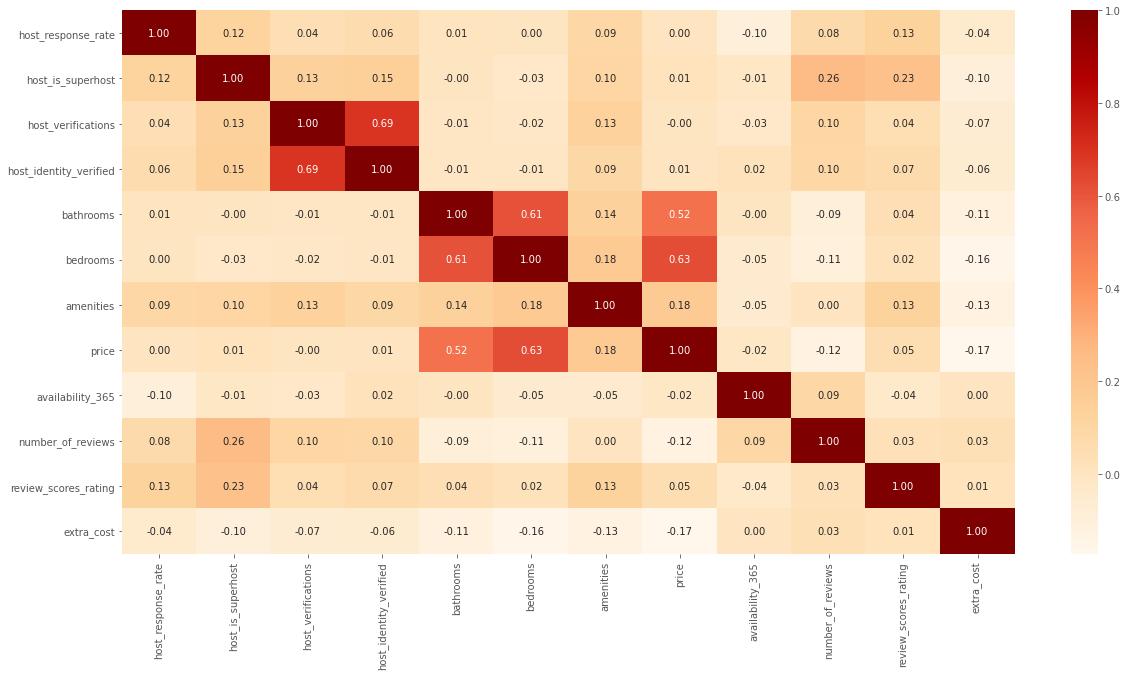

In [21]:
plt.figure(figsize=(20,10))
columns = list(listings_clean.columns)
columns.remove('id')
sns.heatmap(listings_clean[columns].corr(), annot=True, fmt=".2f", cmap='OrRd');

<p>Next we are going to evaluate teh direct realtion of this variable swith price tah is out study variable</p>

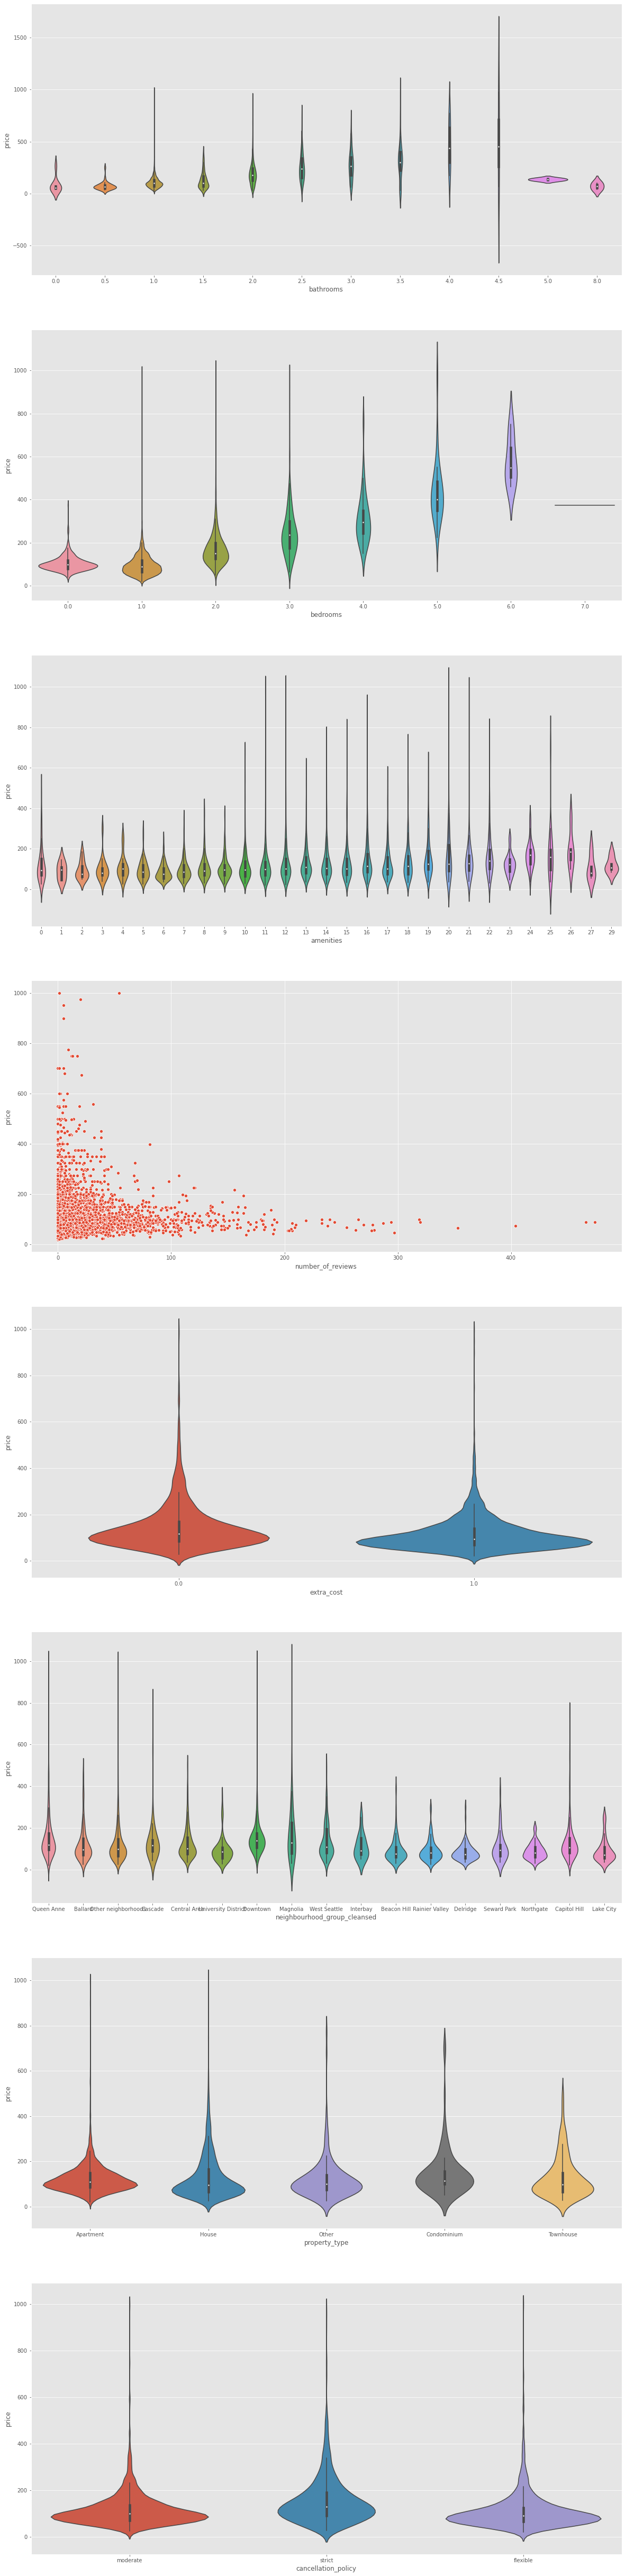

In [22]:
plt.figure(figsize=(20,100))
plt.style.use('ggplot')
columns = ['bathrooms','bedrooms','amenities','number_of_reviews','extra_cost','neighbourhood_group_cleansed','property_type','cancellation_policy']

l_col = len(columns)
row = round(l_col/1,0) + 1

for idx, i in enumerate(columns):
    
    plt.subplot(row,1,idx+1)
    if (i == 'number_of_reviews'):
        sns.scatterplot(listings_clean[i],listings_clean.price)
    else:
        sns.violinplot(listings_clean[i],listings_clean.price)


Now we can clearly see interesting relationships between our variables and the price and we can choose the most significance to train our model.

To answer the question of which are the neighborhoods with the highest and lowest price, we are going to make a simple graph by average price.

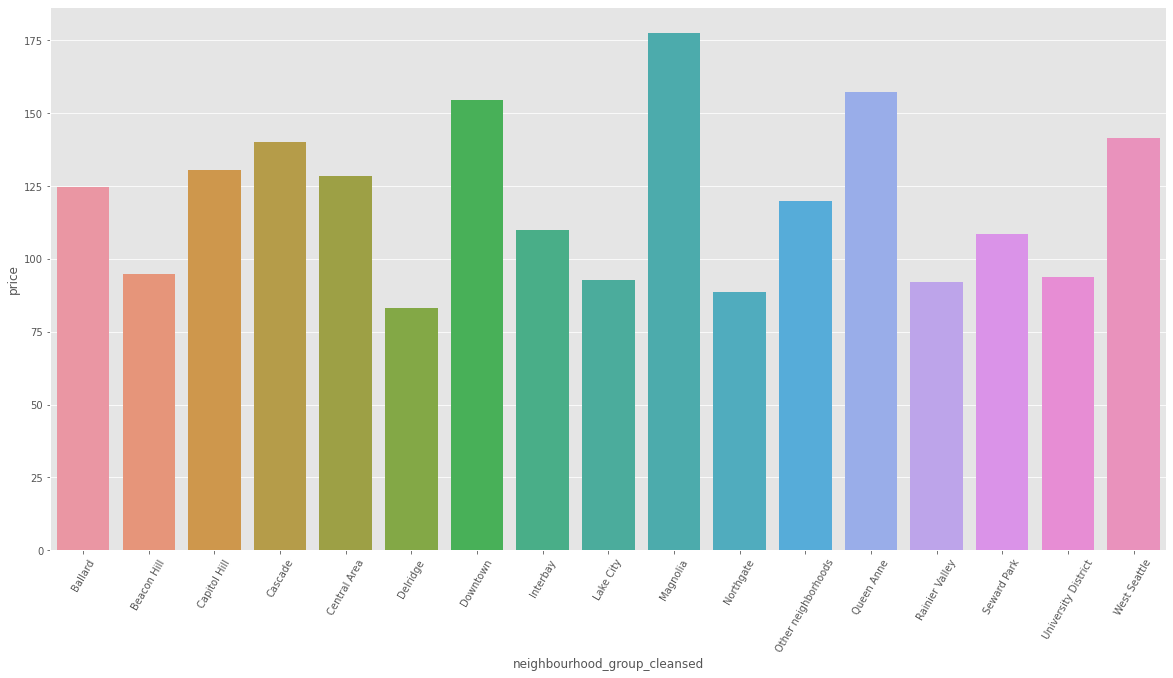

In [23]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
grouped= listings_clean.groupby('neighbourhood_group_cleansed').agg({'price':'mean'})
plt.xticks(rotation=60)
sns.barplot(grouped.index, grouped.price);

At first glance, it appears that Delridge is the cheapest neighborhood and Magnolia is the most expensive. In a more detailed analysis, we will validate if this is true.

### Modeling and Evaluating some basic stats

Linear regressions are not only good for generating predictions of values, they are also usually a useful tool to analyze relationships between data and their impact.


In the next step we will see how using the statsmodels library we can model linear regressions in a simple way and additionally we have several metrics that give us a good interpretation of the data. It also treats categorical data and transforms it into dummy variables.

In [24]:
#train test split
df_train, df_test = train_test_split(listings_clean, test_size=.30, random_state=42)

Next, we must write our formula or regression equation that is simply to relate which is the variable that we want to predict and the variables that we use to predict followed by a plus sign, thus making reference to the equation of a straight line

In [25]:
varible_list = ' + '.join(columns)

In [26]:
varible_list

'bathrooms + bedrooms + amenities + number_of_reviews + extra_cost + neighbourhood_group_cleansed + property_type + cancellation_policy'

Now we will make our model fit the training data and we will perform an analysis of the results

In [27]:
formula = ('price ~ ' + varible_list)
model_all = smf.ols(formula=formula, data=df_train).fit()
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     94.37
Date:                Mon, 09 Nov 2020   Prob (F-statistic):               0.00
Time:                        03:28:20   Log-Likelihood:                -14890.
No. Observations:                2672   AIC:                         2.984e+04
Df Residuals:                    2644   BIC:                         3.000e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

<p>With this summary we see interesting things like
<ul>
<li>We have an R-suare of 0.41 that is, the model is adjusting to the training data to predict by 41%</li>
<li>The coefficients of the region allow us to see how much impact the variable has on the price (taking into account its magnitude), analyzing the coefficients for the cities we can see that our first aporixation of the cheapest and most expensive city was wrong, since When evaluating the complete model, we have that the most expensive neighborhood is Dowtown while the cheapest is Northgate.</li>
<li>There are variables contemplated in the beginning that when training the model we see that they are still significant evaluating their p-value (field P> | t |), for this case the comforts, which solves our second question.</li>
</ul>
</p>

In [28]:
y_predicted = model_all.predict(df_test)
rsquared = df_test.price.corr(y_predicted)**2

In [29]:
rsquared

0.5298688791749615

Here we can see something interesting too, after generating our model we see that R-squere in the test data is much better, when this happens we can determine that the performance of the model is adequate.

To finish and answer question one, we are going to analyze if the variables that we take after all the processing are the really significant ones. For that, again we are going to run the worst model with all the initial variables.

In [30]:
#train test split
df_train, df_test = train_test_split(listings_clean_copy, test_size=.30, random_state=42)

In [31]:
columns_2f = list(df_train.columns)
columns_2f.remove('price')
columns_2f.remove('id')

In [32]:
varible_list2 = ' + '.join(columns_2f)

In [33]:
varible_list2

'host_response_rate + host_acceptance_rate + host_is_superhost + host_verifications + host_has_profile_pic + host_identity_verified + neighbourhood_group_cleansed + property_type + bathrooms + bedrooms + amenities + availability_365 + number_of_reviews + review_scores_rating + cancellation_policy + extra_cost'

In [34]:
formula = ('price ~ ' + varible_list2)
model_all = smf.ols(formula=formula, data=df_train).fit()
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     48.31
Date:                Mon, 09 Nov 2020   Prob (F-statistic):          4.47e-265
Time:                        03:28:25   Log-Likelihood:                -10015.
No. Observations:                1854   AIC:                         2.012e+04
Df Residuals:                    1810   BIC:                         2.036e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [35]:
y_predicted = model_all.predict(df_test)
rsquared = df_test.price.corr(y_predicted)**2

In [36]:
rsquared

0.5510997272937815

We see that many of the variables that we describe are also discarded by the p-value analysis of the model and those that are not, really have a low weight, we see that the model does much better than the first one, but not to a great extent, it is important seek a balance between efficiency and complexity so the first model is a great approximation